In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Assuming your data is in a CSV file
data = pd.read_csv('/content/air_quality_2014.csv')


In [ ]:
# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check unique values in categorical columns
print(data['State'].unique())
print(data['City/Town/Village/Area'].unique())
# ... Repeat for other categorical columns


          Stn Code          SO2          NO2    RSPM/PM10  PM 2.5
count  2879.000000  2868.000000  2866.000000  2875.000000     0.0
mean    475.750261    11.503138    22.136776    62.494261     NaN
std     277.675577     5.051702     7.128694    31.368745     NaN
min      38.000000     2.000000     5.000000    12.000000     NaN
25%     238.000000     8.000000    17.000000    41.000000     NaN
50%     366.000000    12.000000    22.000000    55.000000     NaN
75%     764.000000    15.000000    25.000000    78.000000     NaN
max     773.000000    49.000000    71.000000   269.000000     NaN
Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5          

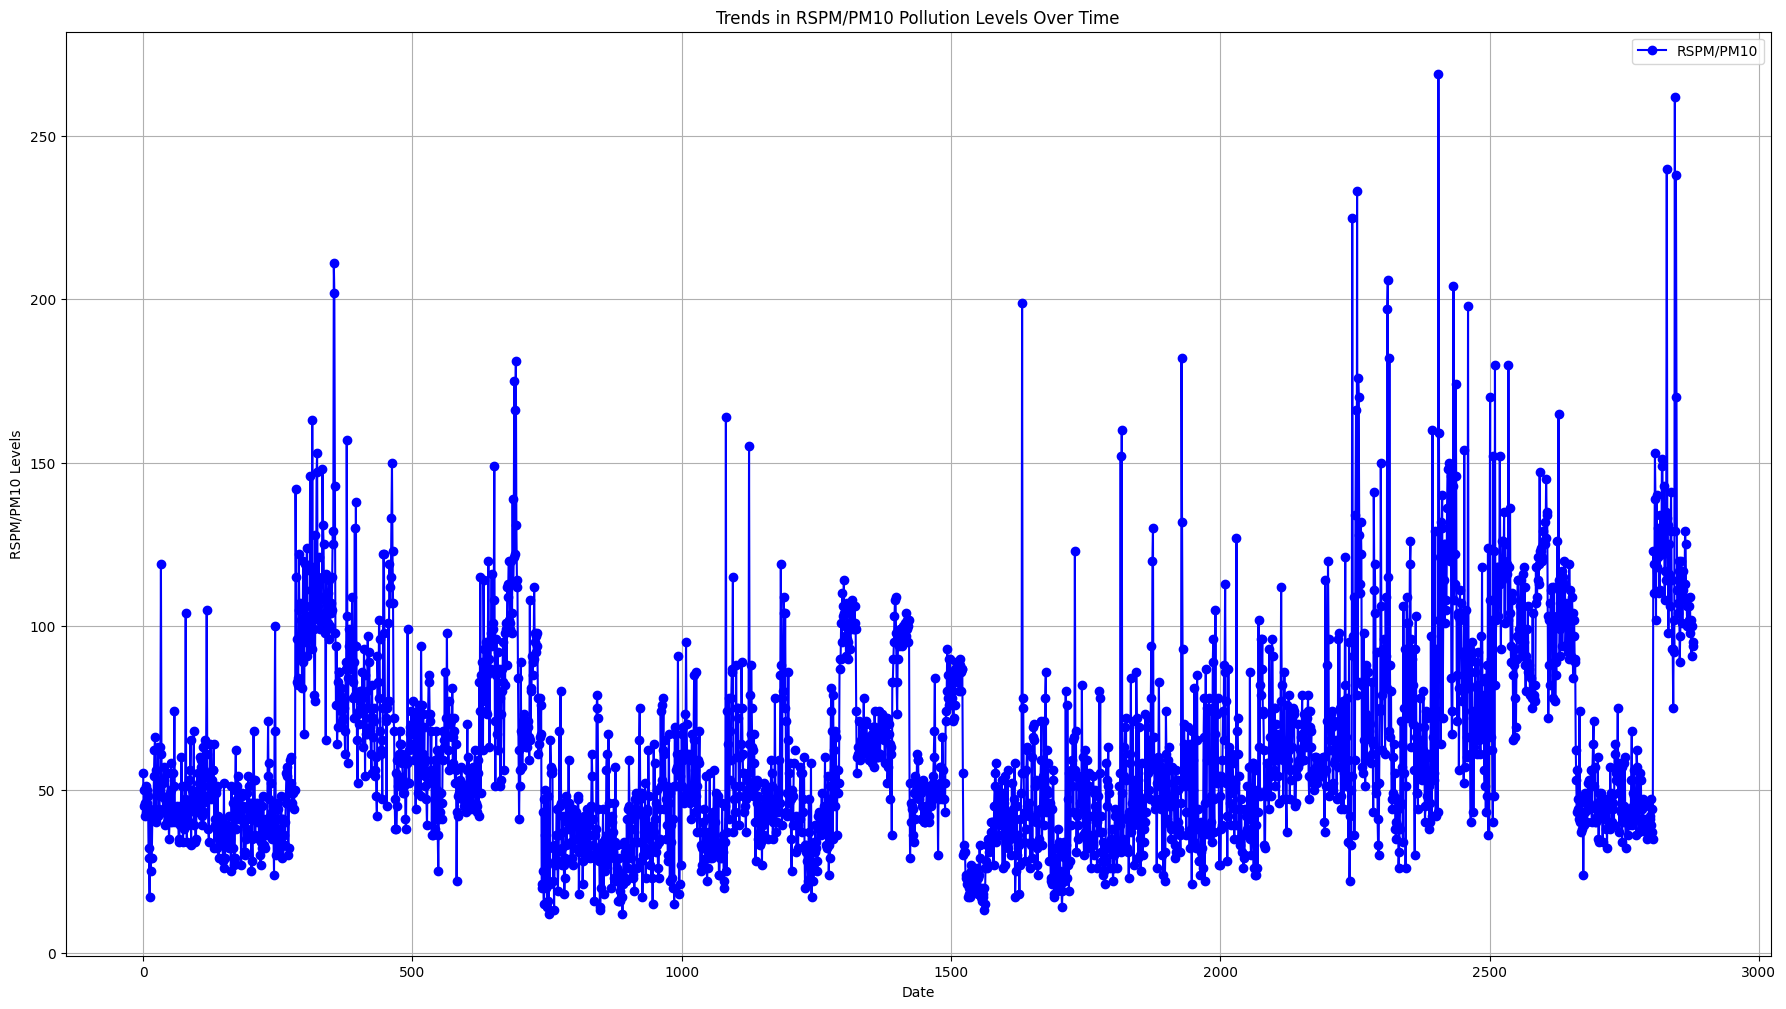

In [ ]:
import matplotlib.pyplot as plt

# Plot a line chart for RSPM/PM10 levels over time
plt.figure(figsize=(22,12))
plt.plot(data.index, data['RSPM/PM10'], marker='o', linestyle='-', color='b', label='RSPM/PM10')
plt.xlabel('Date')
plt.ylabel('RSPM/PM10 Levels')
plt.title('Trends in RSPM/PM10 Pollution Levels Over Time')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-65-80d963c9183a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = data.groupby('Sampling Date').mean()


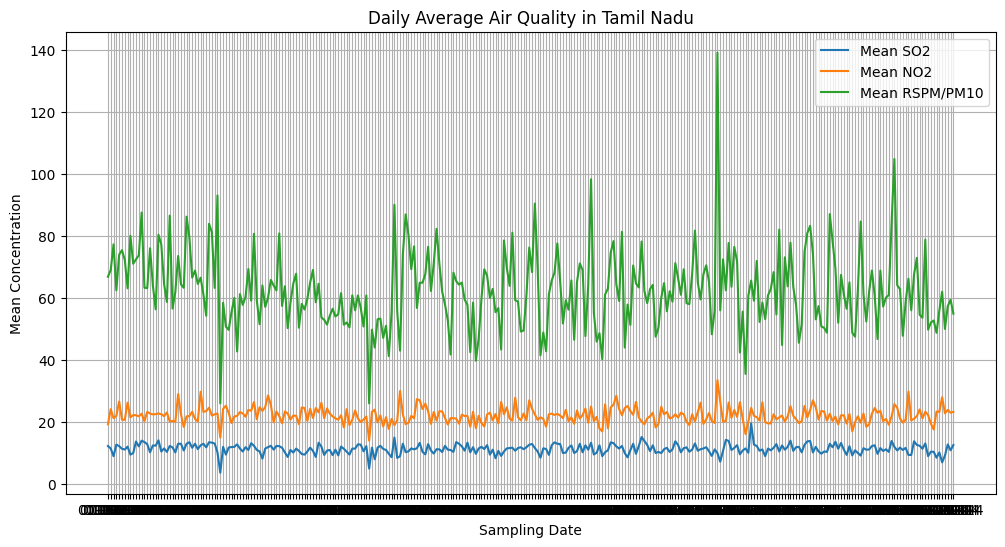

In [ ]:
# Group data by date and calculate mean values
daily_mean = data.groupby('Sampling Date').mean()

# Plot daily average air quality
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['SO2'], label='Mean SO2')
plt.plot(daily_mean.index, daily_mean['NO2'], label='Mean NO2')
plt.plot(daily_mean.index, daily_mean['RSPM/PM10'], label='Mean RSPM/PM10')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration')
plt.title('Daily Average Air Quality in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()



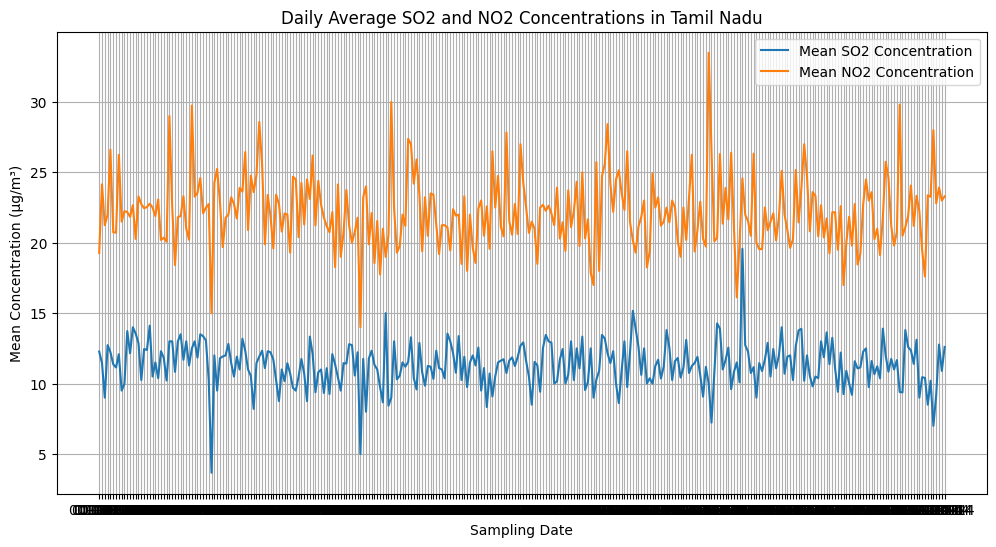

In [ ]:
# Calculate daily average SO2 and NO2 concentrations for all monitoring stations
daily_mean = data.groupby('Sampling Date')[['SO2', 'NO2']].mean()

# Plot daily average SO2 and NO2 concentrations
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['SO2'], label='Mean SO2 Concentration')
plt.plot(daily_mean.index, daily_mean['NO2'], label='Mean NO2 Concentration')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration (µg/m³)')  # Units may vary based on your data
plt.title('Daily Average SO2 and NO2 Concentrations in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()


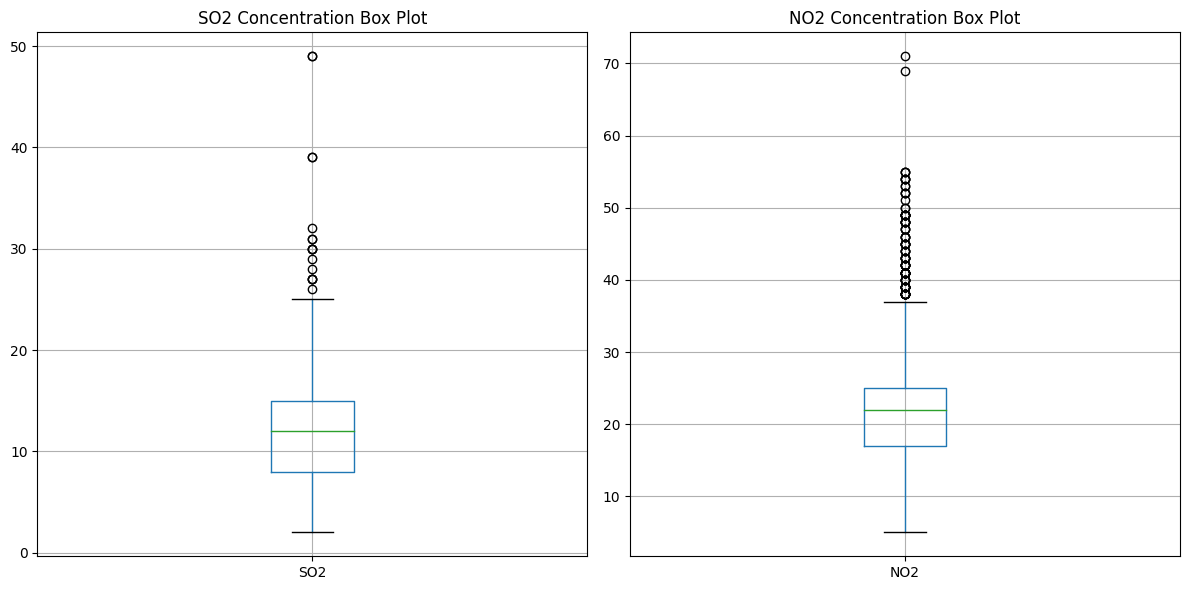

In [ ]:
# Summary statistics
so2_stats = data['SO2'].describe()
no2_stats = data['NO2'].describe()

# Box plots to visualize the distribution and identify outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data.boxplot(column='SO2')
plt.title('SO2 Concentration Box Plot')

plt.subplot(1, 2, 2)
data.boxplot(column='NO2')
plt.title('NO2 Concentration Box Plot')

plt.tight_layout()
plt.show()


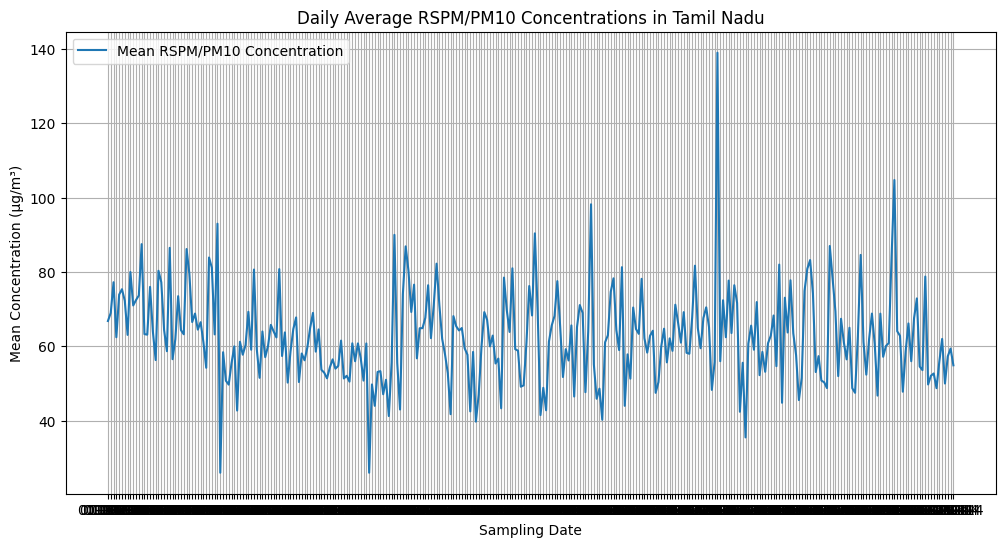

In [ ]:
# Calculate daily average RSPM/PM10 concentrations for all monitoring stations
daily_mean = data.groupby('Sampling Date')[['RSPM/PM10']].mean()

# Plot daily average RSPM/PM10 concentrations
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['RSPM/PM10'], label='Mean RSPM/PM10 Concentration')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration (µg/m³)')  # Units may vary based on your data
plt.title('Daily Average RSPM/PM10 Concentrations in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()


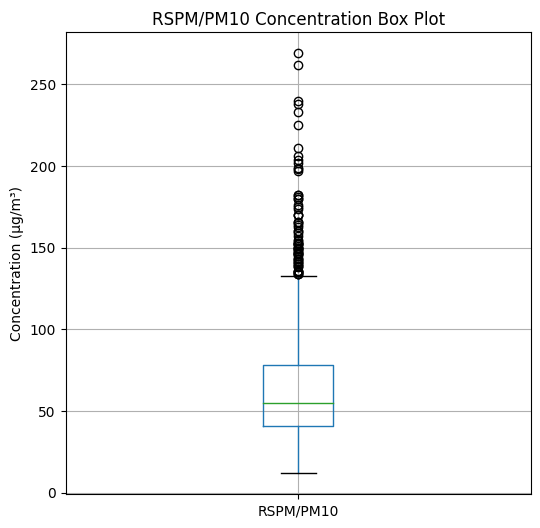

In [ ]:
# Summary statistics
rspm_pm10_stats = data['RSPM/PM10'].describe()

# Box plot to visualize the distribution and identify outliers
plt.figure(figsize=(6, 6))
data.boxplot(column='RSPM/PM10')
plt.title('RSPM/PM10 Concentration Box Plot')
plt.ylabel('Concentration (µg/m³)')  # Units may vary based on your data
plt.grid(True)
plt.show()


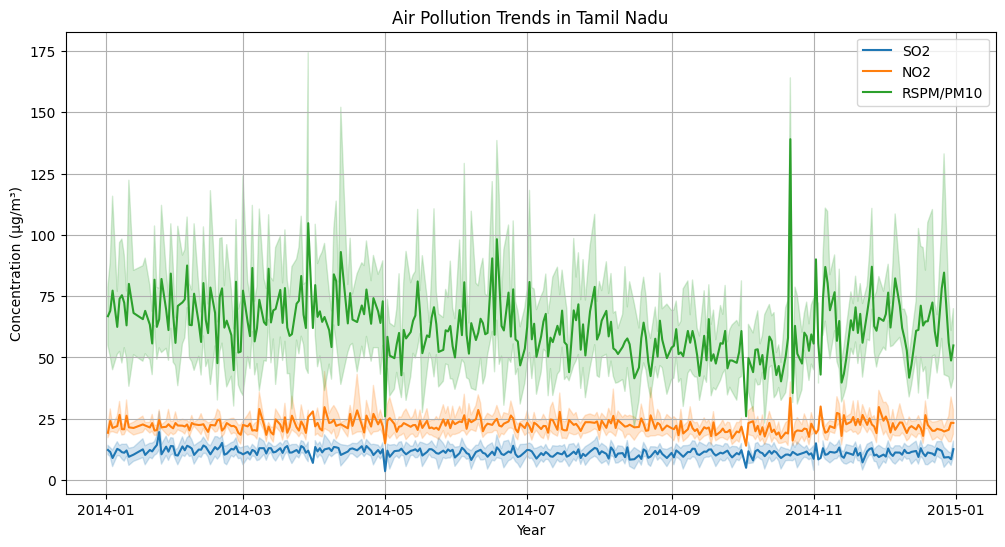

In [ ]:
import seaborn as sns

# Preprocess the data
# - Convert the 'Sampling Date' column to datetime format
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
# - Filter data for Tamil Nadu
tn_data = data[data['State'] == 'Tamil Nadu']

# Visualize trends in air pollution over time
plt.figure(figsize=(12, 6))

# Plot time series of SO2, NO2, and RSPM/PM10 concentrations
for pollutant in ['SO2', 'NO2', 'RSPM/PM10']:
    sns.lineplot(data=tn_data, x='Sampling Date', y=pollutant, label=pollutant)

plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollution Trends in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()


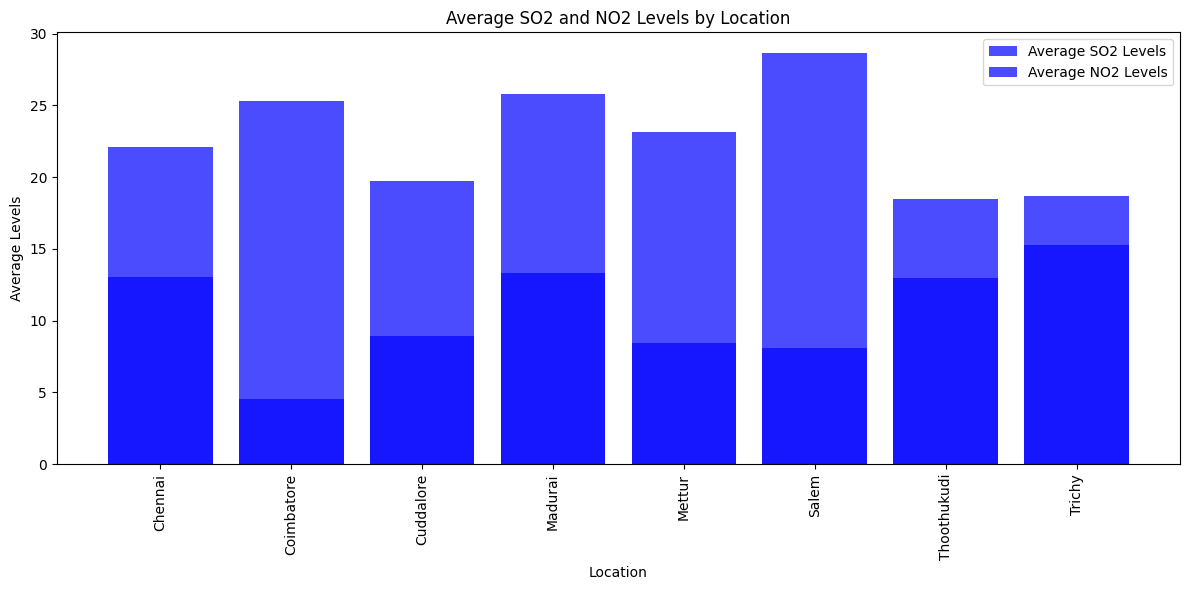

In [ ]:
import matplotlib.pyplot as plt

avg_so2_no2_by_location = data.groupby('City/Town/Village/Area')[['SO2', 'NO2']].mean().reset_index()

# Create a bar chart for average SO2 levels by location
plt.figure(figsize=(12, 6))
plt.bar(avg_so2_no2_by_location['City/Town/Village/Area'], avg_so2_no2_by_location['SO2'], label='Average SO2 Levels', alpha=0.7, color='b')

# Create a bar chart for average NO2 levels by location
plt.bar(avg_so2_no2_by_location['City/Town/Village/Area'], avg_so2_no2_by_location['NO2'], label='Average NO2 Levels', alpha=0.7, color='b')

plt.xlabel('Location')
plt.ylabel('Average Levels')
plt.title('Average SO2 and NO2 Levels by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

Mean Squared Error: 835.4788249190386
R-squared (Coefficient of Determination): 0.20658507746336507


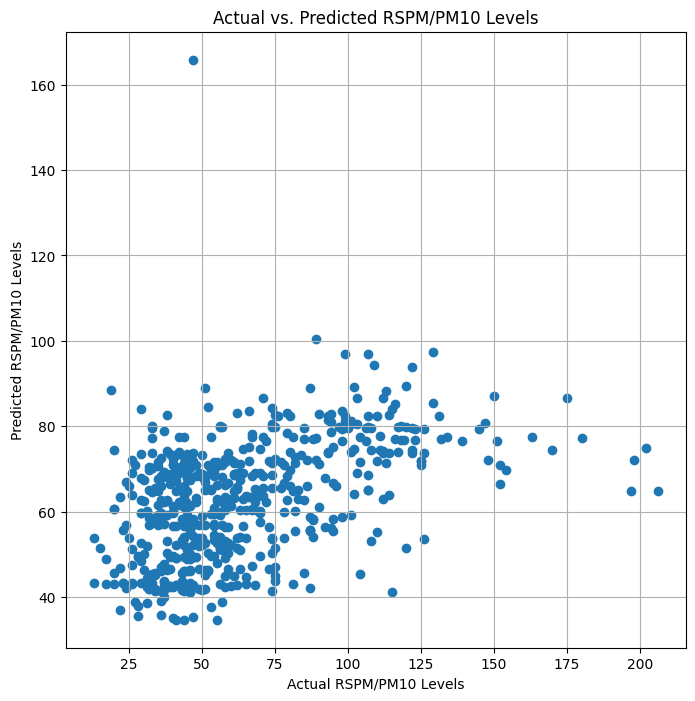

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data and select relevant columns
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
tn_data = data[data['State'] == 'Tamil Nadu']
selected_columns = ['SO2', 'NO2', 'RSPM/PM10']
tn_data = tn_data[selected_columns].dropna()  # Remove rows with missing values

# Split the data into training and testing sets
X = tn_data[['SO2', 'NO2']]
y = tn_data['RSPM/PM10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (Coefficient of Determination): {r2}')

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual RSPM/PM10 Levels')
plt.ylabel('Predicted RSPM/PM10 Levels')
plt.title('Actual vs. Predicted RSPM/PM10 Levels')
plt.grid(True)
plt.show()


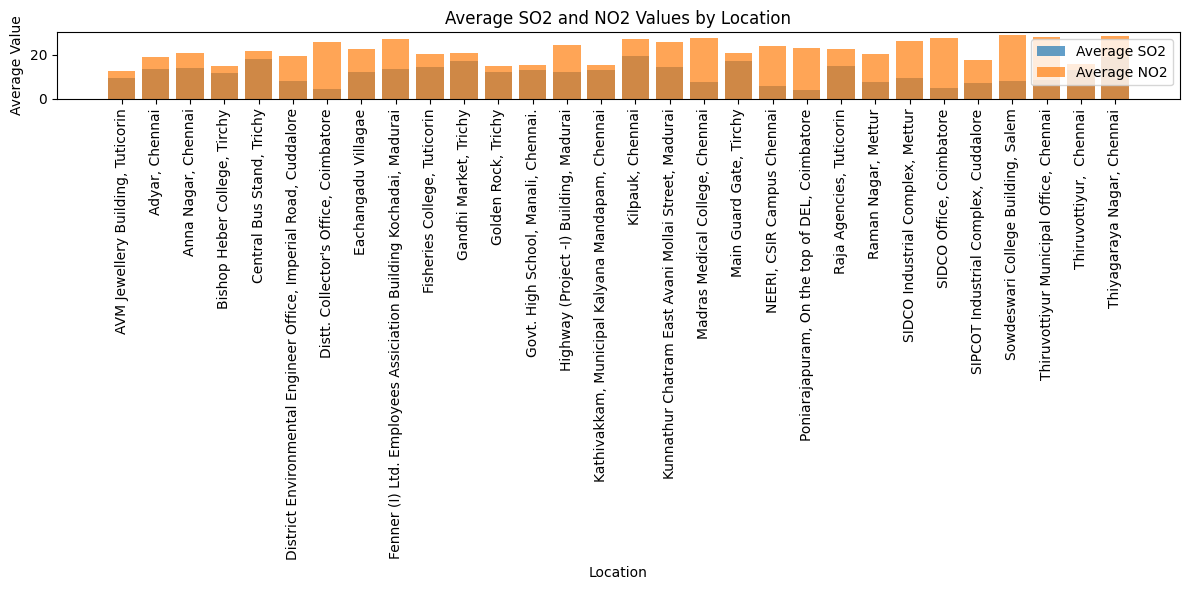

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Group by location and calculate average SO2 and NO2 values
location_averages = data.groupby('Location of Monitoring Station')[['SO2', 'NO2']].mean().reset_index()

# Create a bar plot to visualize the averages
plt.figure(figsize=(12, 6))
plt.bar(location_averages['Location of Monitoring Station'], location_averages['SO2'], label='Average SO2', alpha=0.7)
plt.bar(location_averages['Location of Monitoring Station'], location_averages['NO2'], label='Average NO2', alpha=0.7)
plt.xlabel('Location')
plt.ylabel('Average Value')
plt.title('Average SO2 and NO2 Values by Location')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
!pip install folium geopandas

In [ ]:
!pip install gmaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076086 sha256=f8f50fa40a10827fa62212eca35c66567eb7d629a3ce32de9e18164ce19c2f09
  Stored in directory: /root/.cache/pip/wheels/b3/c2/dc/48b3ef16c2184dae51a003f17eb5d065bbbf1af3437d9f14e3
Successfully built gmaps


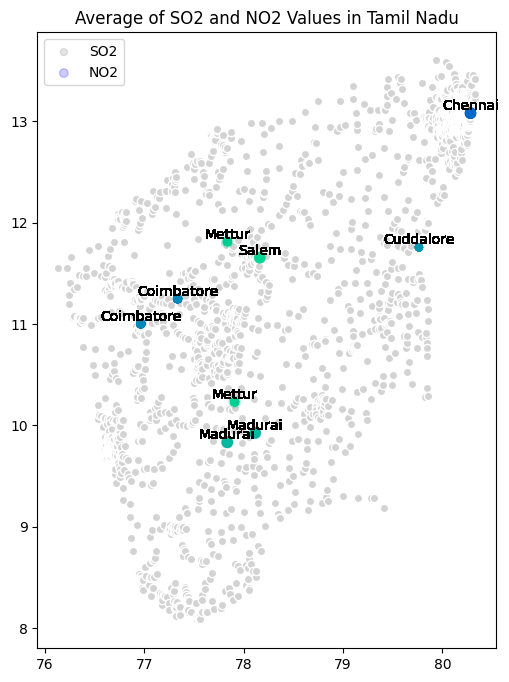

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load geographic boundary data for Tamil Nadu (replace 'tamil_nadu_location.shp' with the actual file path)
tamil_nadu_boundary = gpd.read_file('/content/tamil_nadu_location.shp', encoding='utf-8')


# Merge your data with the Tamil Nadu boundary data based on a common identifier (e.g., location name)
merged_data = tamil_nadu_boundary.merge(data, left_on='NAME', right_on='City/Town/Village/Area', how='right')

# Create a map with the Tamil Nadu boundary data
ax = tamil_nadu_boundary.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the locations and values on the map
merged_data.plot(ax=ax, markersize=merged_data['SO2'], alpha=0.1, legend=True, cmap='gist_heat', label = "SO2")
merged_data.plot(ax=ax, markersize=merged_data['NO2'], alpha=0.2, legend=True, cmap='winter', label = "NO2")

# Add place names as labels to the points on the map
for x, y, label in zip(merged_data.geometry.x, merged_data.geometry.y, merged_data['City/Town/Village/Area']):
   if not pd.isna(x) and not pd.isna(y):
        plt.annotate(label, (x, y), fontsize=10, ha='center', va='bottom')


plt.title('Average of SO2 and NO2 Values in Tamil Nadu')
ax.legend()
plt.show()


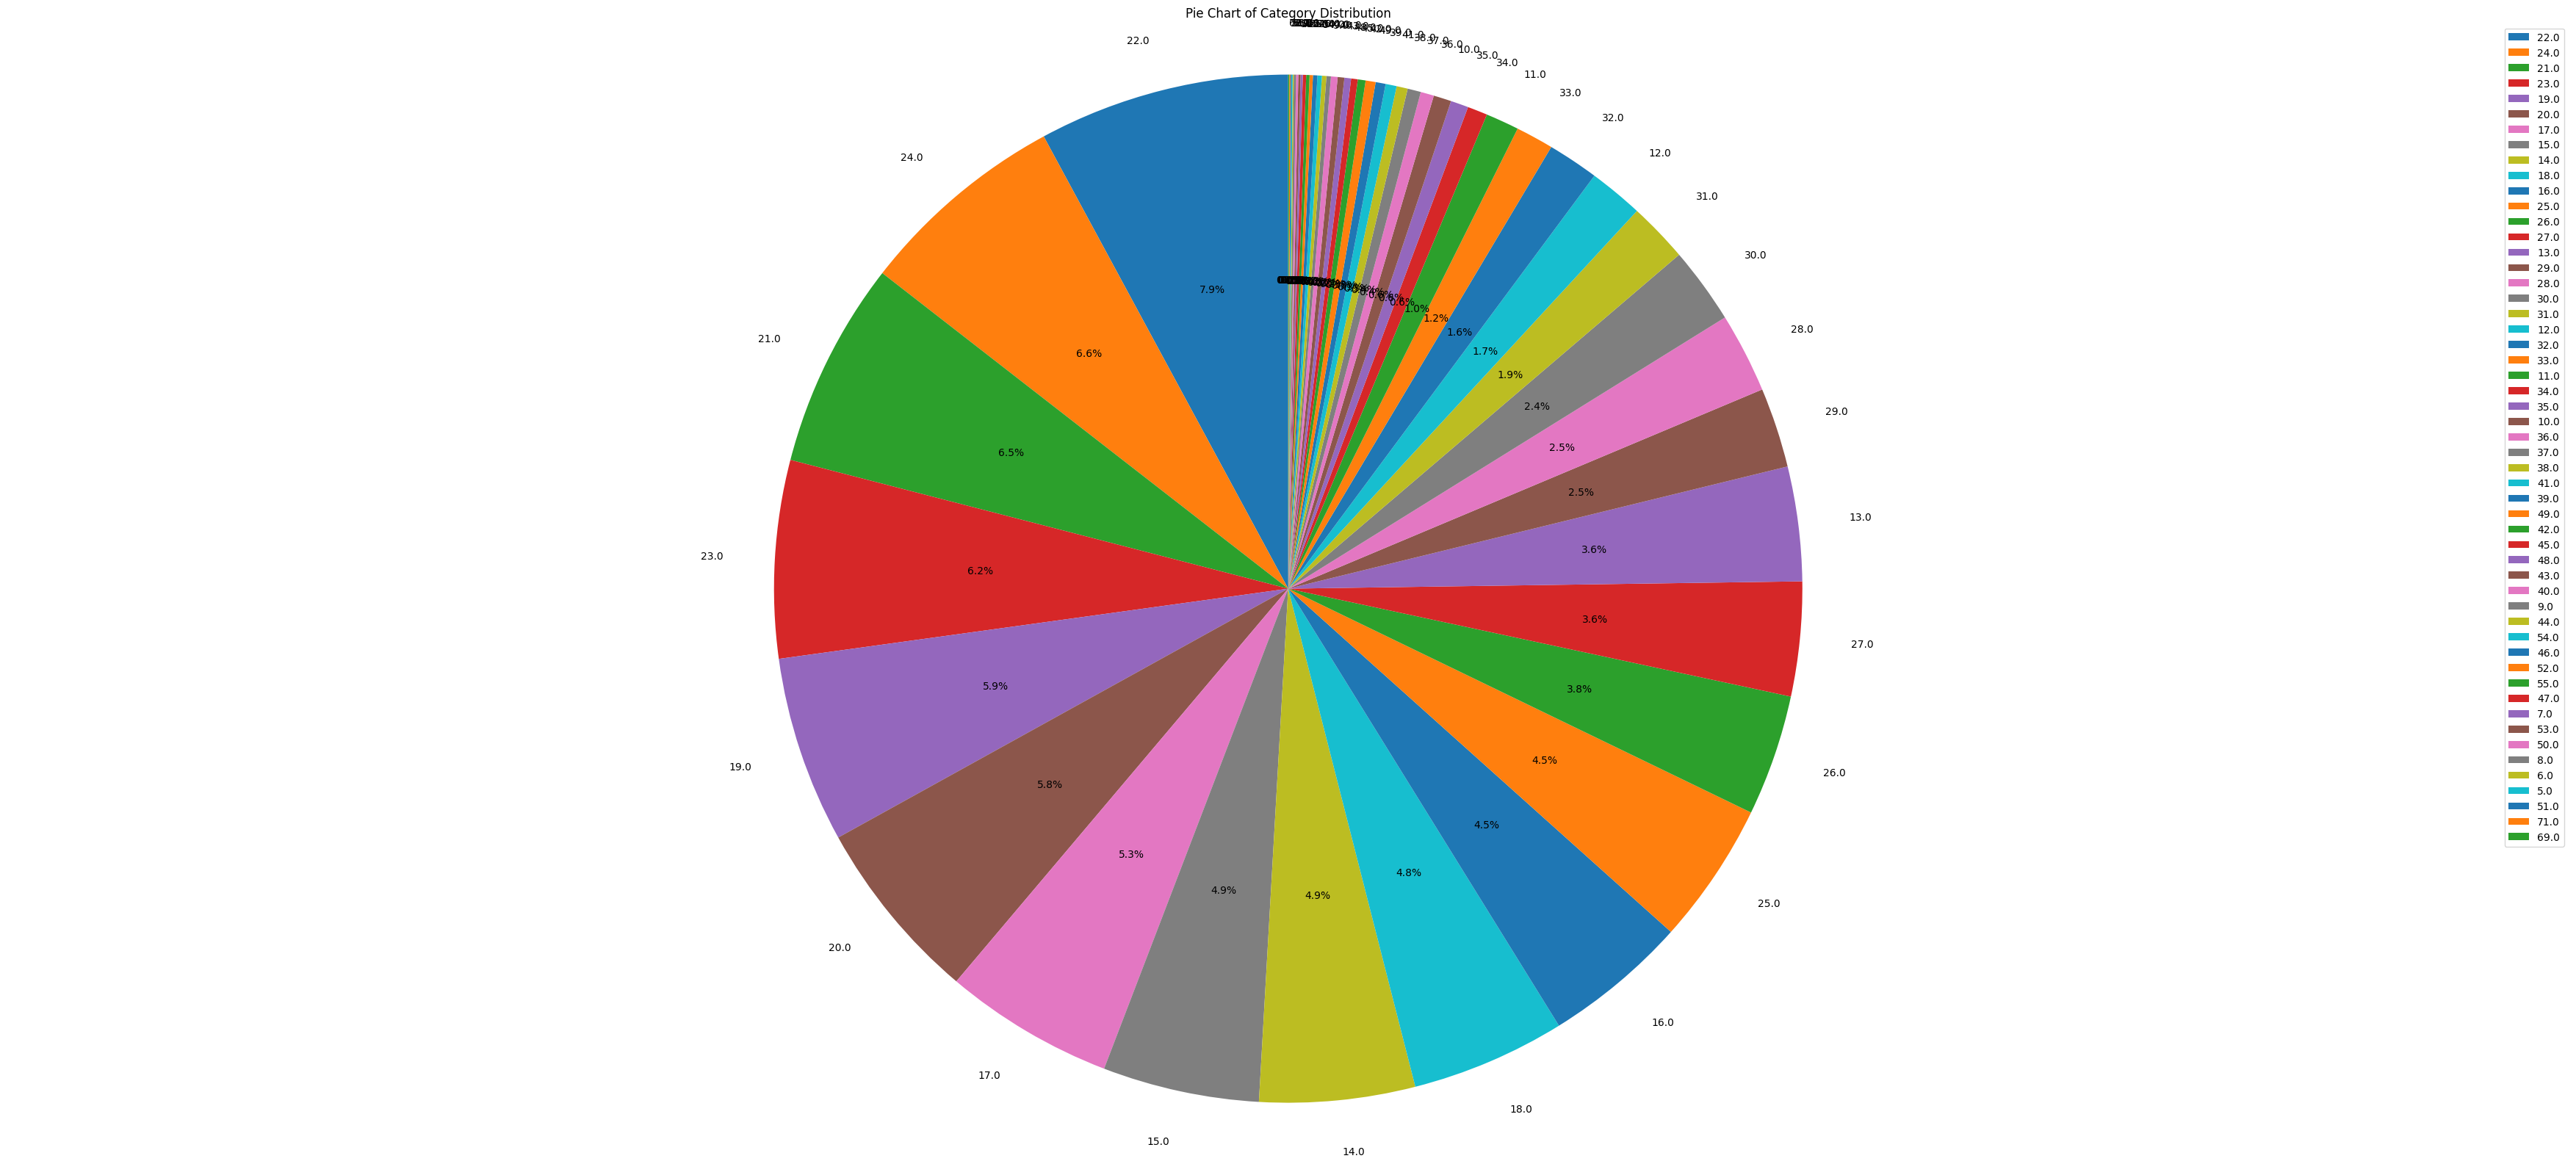

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the data from the 'Category' column
categories = data['NO2']

# Calculate the count of each category
category_counts = categories.value_counts()

# Create a pie chart
plt.figure(figsize=(45, 20))  # Adjust the figure size if needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of Category Distribution')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.legend()
plt.show()